<div style = "height: 700px; width:100%; background-color:#1D8DB0; color:#fff"></div>

<img src="./images/KULeuven.png" >

# Klasse E  Versterkers

<a href="./slides/Klasse-E.slides.html" target="_blank">![sildes](./images/slides-beschikbaar-blue.svg)</a> 
<a href="../Lite/ToegepasteAnalogeElektronica/lab?path=Klasse-E.ipynb" target="_blank">![slides](./images/open_in-JupyterLite-blue.svg)</a>
<a href="../Deck/ToegepasteAnalogeElektronica/lab?path=Klasse-E.ipynb" target="_blank">![slides](./images/JupyterDeck-slides-blue.svg)</a>

<div style = "height: 50px; width:100%; background-color:#1D8DB0;"></div>

<img src="./images/KULeuven.png" >

In [2]:
%config InlineBackend.figure_format = 'svg'
%run cursusdef.py

In de vorige hoofdstukken hebben we de C en F versterkers besproken. Dit zijn hoogfrequent versterkers met 1 vermogen transistor in de vermogentrap. 

In dit hoofdstuk bestuderen we de klasse E versterker. Ook Klasse E versterkers zijn resonante versterkers die bestaan uit een LRC trilkring (of meerdere LC kringen) die aangestuurd wordt door een enkele transistor. Als een gevolg hiervan werkt deze versterker op een vaste frequentie of binnen een zeer beperkte bandbreedte rond deze centrale frequentie. Deze bandbreedte is typisch maximaal 1%  van de resonantie frequentie.
In {numref}`vermogenversterkersE` geven we een overzicht van deze verschillende versterkers.

```{table} Indeling van de vermogenversterkers
:name: vermogenversterkersE

|   | laagfrequent of breedband  | hoogfrequent of resonant|
|:--| :-- | :-- |
|1 transistor <BR> in de vermogentrap  |Klasse A      |Klasse C <BR> Klasse F <BR>**Klasse E**|
|2 of meer  transistors <BR>in de vermogentrap |  Klasse B  <BR> Klasse G| Klasse D  |
```


######  Overzicht
 


## Werking van de  Klasse E versterker (verklaring van de werking stap voor stap)

De klasse E versterkers zijn initieel uitgewerkt door Sokal and Sokal <cite id="75ii2"><a href="#zotero|1031761/96BMKR88">[1]</a></cite><cite id="p24ri"><a href="#zotero|1031761/CXUZ8ZFG">[2]</a></cite><cite id="9qfqr"><a href="#zotero|1031761/G2K7PIUF">[3]</a></cite>

### Serie resonante kring

###### Resonante seriekring van de klasse E versterker

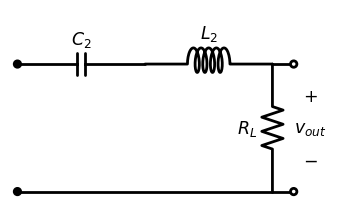

In [3]:
d = schem.Drawing()
d.add(e.DOT)
C2 = d.add(e.CAP, d='right', label='$C_2$')
L2 = d.add(e.INDUCTOR2, d='right', label='$L_2$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=C2.start)
d.add(e.DOT)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)
d.draw()

#### Stroom in de serie resonante kring (1)

###### Stroom in resonante seriekring

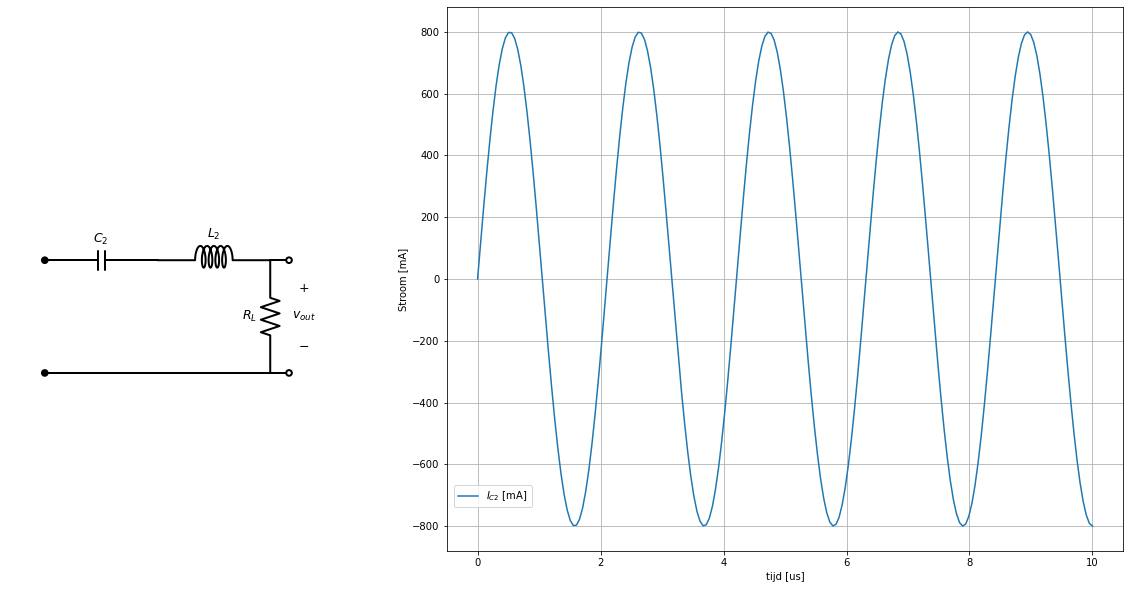

In [62]:
figure, ax = plt.subplots(1,2,figsize=(20, 10), gridspec_kw={'width_ratios': [1, 2]})
d.draw(ax=ax[0])
ax[0].set_xlim(-1,8)
ax[0].set_ylim(-5,4)
ax[0].set_aspect('equal')
ax[0].set_axis_off()
time=np.linspace(0,1e-5,200)
iC2L2=800*np.sin(475000*np.pi*2*time)
ax[1].plot(time*1e6,iC2L2,label='$I_{C2}$ [mA] ')
ax[1].legend( loc=(0.01,.08))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_ylabel('Stroom [mA]');


###### Voeding met DC stroom door L1

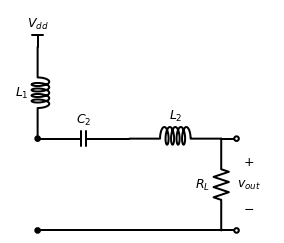

In [64]:
d = schem.Drawing()
d.add(e.VDD, label='$V_{dd}$')
L1 = d.add(e.INDUCTOR2, d='down', label='$L_1$')
d.add(e.DOT)
C2 = d.add(e.CAP, d='right', label='$C_2$')
L2 = d.add(e.INDUCTOR2, d='right', label='$L_2$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=C2.start)
d.add(e.DOT)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)
d.draw()

###### Voeding met DC stroom door L1

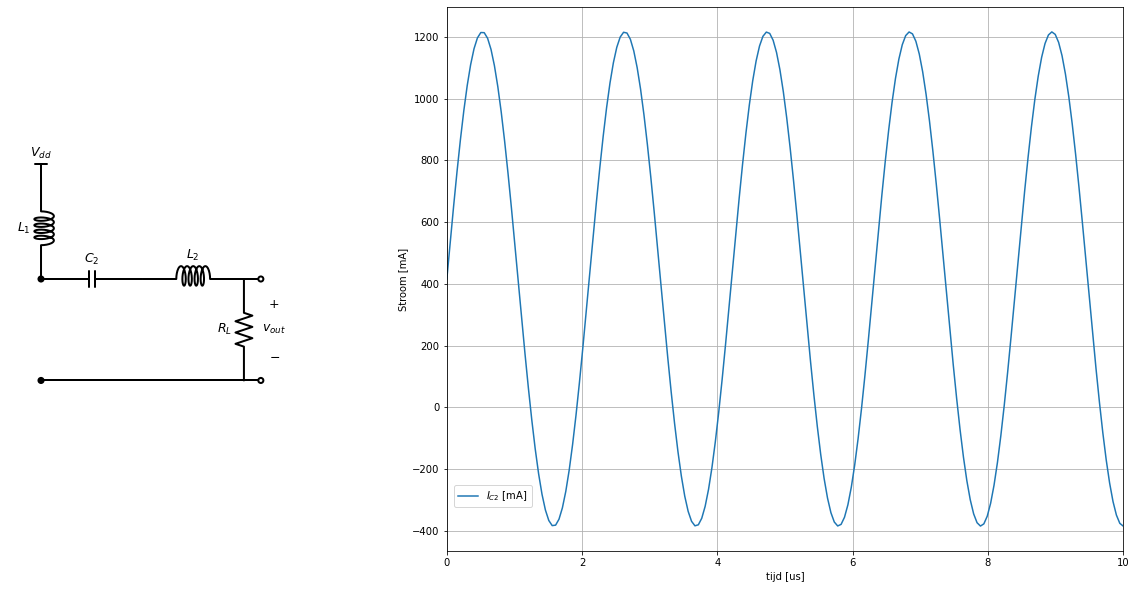

In [67]:
figure, ax = plt.subplots(1,2,figsize=(20, 10), gridspec_kw={'width_ratios': [1, 2]})
d.draw(ax=ax[0])
ax[0].set_xlim(-1,9)
ax[0].set_ylim(-8,2)
ax[0].set_aspect('equal')
ax[0].set_axis_off()
time=np.linspace(0,1e-5,200)
iC2L2=800*np.sin(475000*np.pi*2*time)+416
ax[1].plot(time*1e6,iC2L2,label='$I_{C2}$ [mA] ')
ax[1].legend( loc=(0.01,.08))
ax[1].grid()
ax[1].set_xlim(0,10)
ax[1].set_xlabel('tijd [us]')
ax[1].set_ylabel('Stroom [mA]');

### Integratie op een condensator $C_1$

De spanning die bekomen wordt ten gevolge van de integratie op een condensator is:

$$v=\frac{1}{C_1}\int_0^t i(t) dt $$

###### Integratie stroom op C1

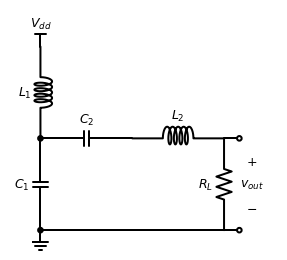

In [68]:
d = schem.Drawing()
d.add(e.VDD, label='$V_{dd}$')
L1 = d.add(e.INDUCTOR2, d='down', label='$L_1$')
d.add(e.DOT)
C2 = d.add(e.CAP, d='right', label='$C_2$')
L2 = d.add(e.INDUCTOR2, d='right', label='$L_2$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=C2.start)
d.add(e.DOT)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)
C1 = d.add(e.CAP, d='down',xy=L1.end,toy=R.end, label='$C_1$')
d.add(e.GND)
d.draw()

### Integratie van de stoom op een condensator van 4.7nF 

###### Integratie stroom op C1

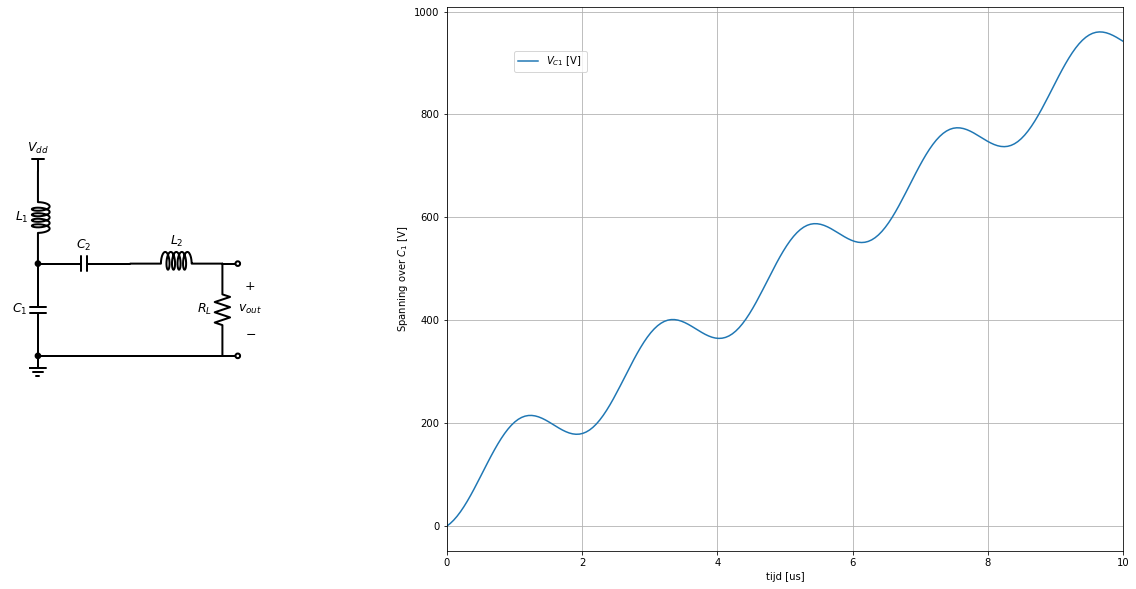

In [69]:
figure, ax = plt.subplots(1,2,figsize=(20, 10), gridspec_kw={'width_ratios': [1, 2]})
d.draw(ax=ax[0])
ax[0].set_xlim(-1,10)
ax[0].set_ylim(-9,2)
ax[0].set_aspect('equal')
ax[0].set_axis_off()
time=np.linspace(0,1e-5,200)
vc1=1/4.7e-9*(-800*(np.cos(475000*np.pi*2*time)-1)/(475000*np.pi*2)+416*time)/1000
ax[1].plot(time*1e6,vc1,label='$V_{C1}$ [V] ')
ax[1].legend( loc=(0.1,.88))
ax[1].grid()
ax[1].set_xlim(0,10)
ax[1].set_xlabel('tijd [us]')
ax[1].set_ylabel('Spanning over $C_1$ [V]');

###### Transistor om de spanning op  0 te houden

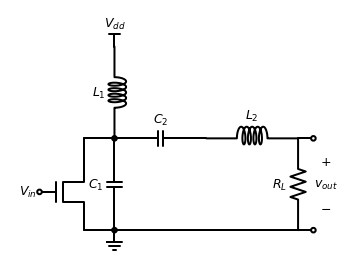

In [70]:
d = schem.Drawing()
d.add(e.VDD, label='$V_{dd}$')
L1 = d.add(e.INDUCTOR2, d='down', label='$L_1$')
d.add(e.DOT)
C2 = d.add(e.CAP, d='right', label='$C_2$')
L2 = d.add(e.INDUCTOR2, d='right', label='$L_2$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=C2.start)
d.add(e.DOT)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)
C1 = d.add(e.CAP, d='down',xy=L1.end,toy=R.end, label='$C_1$')
d.add(e.GND)
d.add(e.LINE, d='left', l=1)
d.add(e.LINE, d='up', l=0.5)
T = d.add(e.NFET, d='left', lftlabel='$V_{in}$')
d.add(e.LINE, d='up',toy=R.start)
d.add(e.LINE,tox=L1.end, d='right')
d.add(e.DOT_OPEN, xy=T.gate)
d.draw()

###### Spanning na integratie stroom op C1

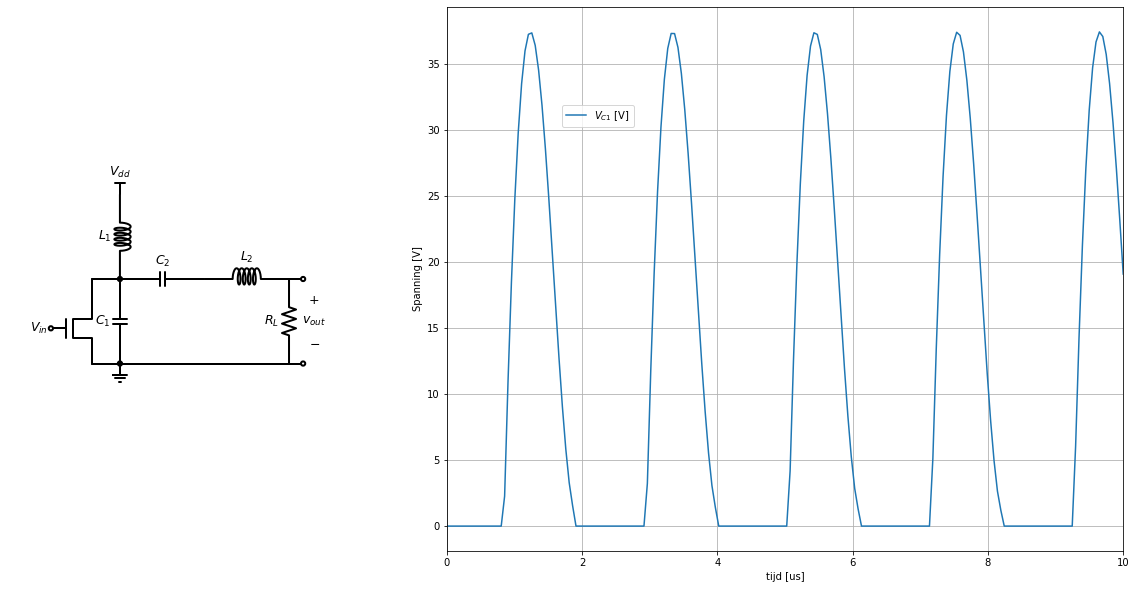

In [73]:
a=0.2
def vcf(time,a):
    halfperiod=int(time/1.05263e-6+a)
    if halfperiod%2==0:
        return 0
    else:
        vc1=1/4.7e-9*(-800*(np.cos(475000*np.pi*2*time)-1)/(475000*np.pi*2)+416*time)/1000
        time2=(halfperiod-a)*1.05263e-6
        vc2=1/4.7e-9*(-800*(np.cos(475000*np.pi*2*time2)-1)/(475000*np.pi*2)+416*time2)/1000
        return vc1-vc2

figure, ax = plt.subplots(1,2,figsize=(20, 10), gridspec_kw={'width_ratios': [1, 2]})
d.draw(ax=ax[0])
ax[0].set_xlim(-4,8)
ax[0].set_ylim(-9,3)
ax[0].set_aspect('equal')
ax[0].set_axis_off()
time=np.linspace(0,1e-5,200)
iC2L2=200*np.sin(475000*np.pi*2*time)+416
ax[1].plot(time*1e6,[vcf(x,a) for x in time],label='$V_{C1}$ [V] ')
ax[1].legend( loc=(0.17,.78))
ax[1].grid()
ax[1].set_xlim(0,10)
ax[1].set_xlabel('tijd [us]')
ax[1].set_ylabel('Spanning [V]');

## Ontwerpen van enkele voorbeelden

Voor het ontwerpen van een aantal voorbeelden nemen we de vergelijkingen vanuit <cite id="9qfqr"><a href="#zotero|1031761/G2K7PIUF">[3]</a></cite>. Deze ontwerpvergelijkingen zijn in eerste instantie aangepast aan de lagere frequenties. Voor MHz frequenties moet er in detail geanalyseerd en gesimuleerd worden.


$$R_L= 0.576801 \frac{(V_{DD}-V_{sat})^2}{P} \left(1.0000086-\frac{0.414396}{Q}-\frac{0.577501}{Q^2}+\frac{0.205967}{Q^3}   \right) $$

$$C_1= \frac{1 }{5.4466 \omega R_L} \left(0.99866+\frac{0.91424}{Q}-\frac{1.03175}{Q^2}\right)+\frac{0.6}{\omega^2 L_1} $$

$$C_2= \frac{1 }{\omega R_L} \left( \frac{1 }{Q-0.104823} \right)\left(1.00121+\frac{1.01468 }{Q-1.7879} \right)-\frac{0.2}{\omega^2 L_1} $$

$$L_2=\frac{Q R_L}{\omega} $$


met $\omega=2 \pi f$

### VB1: een 475 kHz versterker

We ontwerpen een klasse E versterker die een vermogen van 5W moet kunnen leveren bij een frequentie van 475 kHz, bij een voedingsspanning van 12.5V, met een Q factor van 5 en een saturatiespanning van de bipolaire transistor van 0.5 V. 

###### VB1: Bekomen waardes

In [36]:
def ClassECalc(Q=5, Vcc=12.5, Vo=0.5, f=475000,L1=0.001, P=5, verbose=False, plot=True,TransformerCoax=False):
    
    R=0.576801*((Vcc-Vo)*(Vcc-Vo)/P)*(1.0000086-(0.414396/Q)-(0.577501/(Q*Q))+(0.205967/(Q*Q*Q)));
    C1=(1/(34.2219*f*R))*(0.99866+(0.91424/Q)-(1.03175/(Q*Q)))+0.6/((2*np.pi*f)*(2*np.pi*f)*L1);
    XC1=-1/(2*np.pi*f*C1);
    C2=(1/(2*np.pi*f*R))*(1/(Q-0.104823))*(1.00121+1.01468/(Q-1.7879))-0.2/(2*np.pi*f*2*np.pi*f*L1);
    XC2=-1/(2*np.pi*f*C2);
    L2=Q*R/(2*np.pi*f);
    XL2=2*np.pi*f*L2;
    Icc = P/(Vcc-Vo);
    Vds = Vcc*3.56/0.8;
    tr = np.sqrt(50.0/R)
    DX=XL2+XC2
    if verbose:
        print("R{} = {:.2f} Ohm".format('L', R))
        print("C\u2081 = {:.2f} nF, wat overeenkomt met een complexe impedantie van {:.2f} i Ohm".format(C1*1000000000, XC1))
        print("C\u2082 = {:.2f} nF, wat overeenkomt met een complexe impedantie van {:.2f} i Ohm".format( C2*1000000000, XC2))
        print("L\u2082 = {:.2f} uH, wat overeenkomt met een complexe impedantie van {:.2f} i Ohm".format( L2*1000000, XL2))
        print("De totale complexe impedantie van de seriekring is {:.2f} i Ohm".format(DX))
        print("De maximale stroom uit de voeding is {:.2f} mA".format(Icc*1000))
        print("De maximale source-drain spanning over de transistor (inclusief veiligheidsmarge 80 %) is {:.2f} V".format(Vds))
        print("We kunnen de uitgang omwerken naar een impedantie van 50 Ohm door een transformator met wikkelverhouding: {:.2f} ".format(tr))
    if plot:
        d = schem.Drawing()
        d.add(e.VDD, label='$V_{dd}$')
        eL1 = d.add(e.INDUCTOR2, d='down', label="{:.2f} uH".format(L1*1000000))
        d.add(e.DOT)
        eC2 = d.add(e.CAP, d='right', label="{:.2f} nF".format(C2*1000000000))
        eL2 = d.add(e.INDUCTOR2, d='right', label="{:.2f} uH".format(L2*1000000))
        if TransformerCoax:
            trans = d.add(e.Transformer( d='right',anchor='p1', label="{:.2f}".format(tr)))
            d.add(e.LINE, xy=trans.s1, d='right', l=1)
            coax=d.add(e.Coax, label="50 Ohm")
            d.add(e.LINE, xy=coax.end, d='right', l=0.5)
            updot=d.add(e.DOT_OPEN)
            d.add(e.LINE,xy=coax.shieldend, d='down',toy=trans.s2)
            d.add(e.LINE, d='right',tox=updot.start)
            downdot=d.add(e.DOT_OPEN)
            d.add(e.GAP_LABEL, d='down',xy=updot.start, toy= downdot.start, label=['+','$v_{out}$','$-$'])
            d.add(e.LINE,xy=coax.shieldstart, d='down',toy=trans.s2)
            d.add(e.LINE, d='left',tox=trans.s2)
            d.add(e.LINE, d='left',xy=trans.p2, tox=eC2.start)
        else:
            eR = d.add(e.RES, d='down', label="{:.2f} Ohm".format(R))
            d.add(e.LINE, xy=eR.start, d='right', l=0.5)
            d.add(e.DOT_OPEN)
            d.add(e.GAP_LABEL, d='down', toy= eR.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)
            d.add(e.LINE,xy=eR.end, d='right',l=0.5)
            d.add(e.DOT_OPEN)
            d.add(e.LINE, d='left', tox=eC2.start)
        d.add(e.DOT)
        eC1 = d.add(e.CAP, d='up',toy=eL1.end)
        eC1.add_label(label="{:.2f} nF".format(C1*1000000000),loc='bottom')
        d.add(e.GND,xy=eC1.start)
        d.add(e.LINE, d='left', l=1)
        eT = d.add(e.NFET, d='left', lftlabel='$V_{in}$')
        d.add(e.LINE, d='up',toy=eL1.end)
        d.add(e.LINE,tox=eL1.end, d='right')
        d.add(e.DOT_OPEN, xy=eT.gate)
        return d.draw()

ClassECalc(verbose=True,plot=False)

RL = 14.88 Ohm
C₁ = 4.78 nF, wat overeenkomt met een complexe impedantie van -70.07 i Ohm
C₂ = 6.04 nF, wat overeenkomt met een complexe impedantie van -55.50 i Ohm
L₂ = 24.93 uH, wat overeenkomt met een complexe impedantie van 74.39 i Ohm
De totale complexe impedantie van de seriekring is 18.89 i Ohm
De maximale stroom uit de voeding is 416.67 mA
De maximale source-drain spanning over de transistor (inclusief veiligheidsmarge 80 %) is 55.62 V
We kunnen de uitgang omwerken naar een impedantie van 50 Ohm door een transformator met wikkelverhouding: 1.83 


###### VB1: Bekomen schema

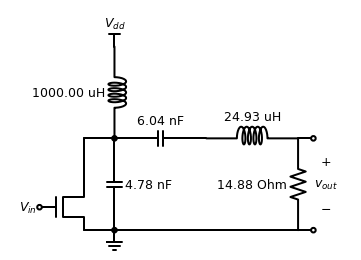

In [140]:
ClassECalc()

###### VB1: SPICE file

In [3]:
display.Code(filename="simul\classE2.sp", language='spice') 

* Class E amp 1
M_M1         2 1 0 0 FDB33N25 
L_L1         2 3  1000uH  
C_C1         2 0  4.78nF  
L_L2         4 5  24.93uH  
C_C2         2 4  6.04nF  
R_RL         5 0  14.88 
V_Vdd        3 0 12.5V
V_Vin        1 0 PULSE(0 9 1.05u 20n 20n 1.05u 2.10526u) DC=0
.model FDB33N25 VDMOS(Rg=3 Rd=40m Rs=27m Vto=5.35 Kp=35 lambda=.05 Cgdmax=1.1n Cgdmin=25p Cgs=1.7n Cjo=800p Is=7.94p Rb=7m mfg=Fairchild Vds=250 Ron=94m Qg=37n)

```{code-block} spice
---
name: eSpice2
caption: Klasse E spice file
---
```

###### VB1: Verloop spanningen (opstarten oscillatie)

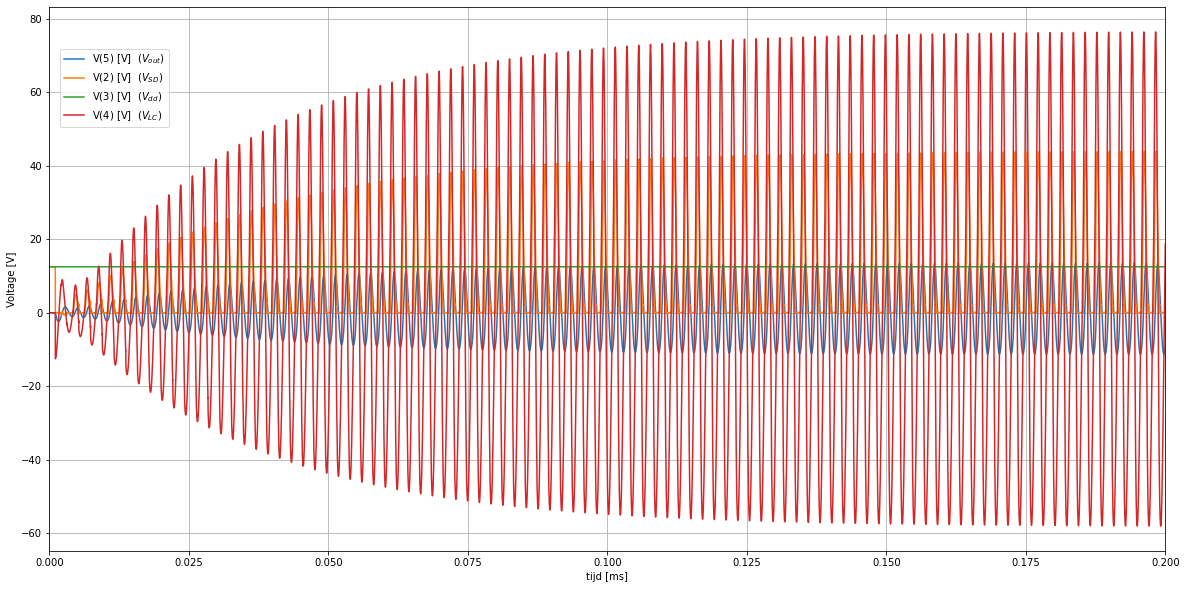

In [40]:
circuit=SpiceParser(path='simul\classE2.sp').build_circuit()  
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
simulator.save_currents="I1(M_M1)"
analysis = simulator.transient(step_time=3e-9, end_time=end_time)

figure, ax = plt.subplots(figsize=(20, 10))
ax.plot(analysis.time*1e3,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e3,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['4'],label='V(4) [V]  ($V_{LC}$)' )
ax.legend( loc=(0.01,.78))
ax.grid()
ax.set_xlabel('tijd [ms]')
ax.set_xlim(0,end_time*1e3)
ax.set_ylabel('Voltage [V]')
plt.show()

### Detail van de opstartsequentie

###### VB1: Initieel verloop van de spanningen

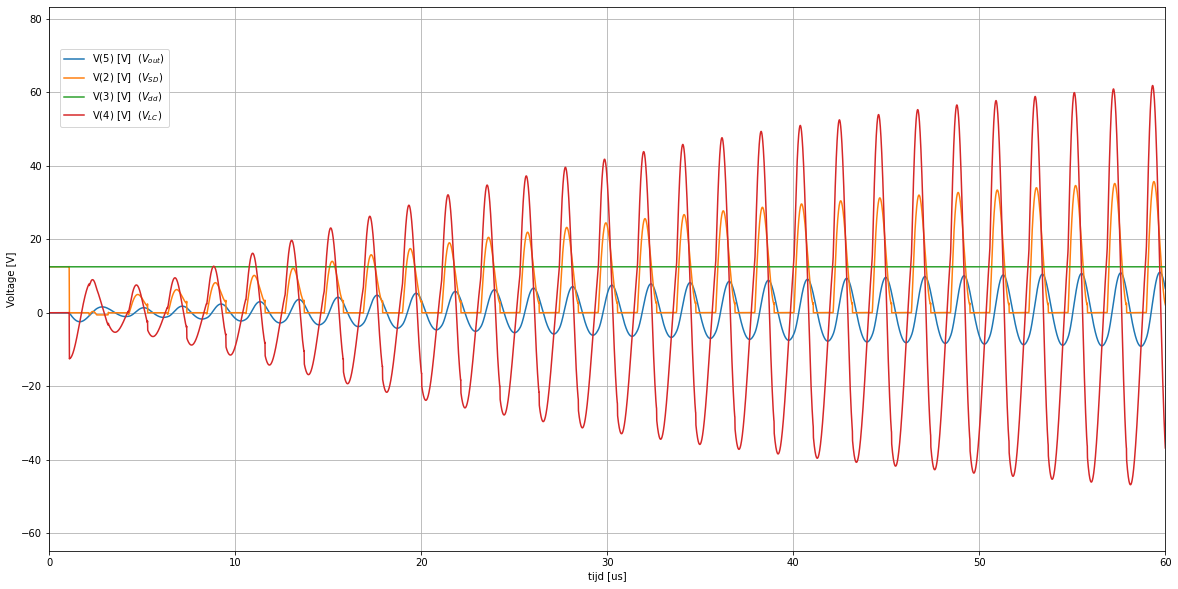

In [19]:
figure, ax = plt.subplots(figsize=(20, 10))
ax.plot(analysis.time*1e6,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['4'],label='V(4) [V]  ($V_{LC}$)' )
ax.legend( loc=(0.01,.78))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*3e5)
ax.set_ylabel('Voltage [V]')
plt.show()

### 1 periode van de Steady State

Rechtsonder op {numref}`efig13` kan je ook het verloop van de stroom door de voeding zien bij de voedingsgspanning. Aangezien beiden nauwelijks veranderen is dit verloop bijna niet zichtbaar.

###### VB1: detail 1 periode

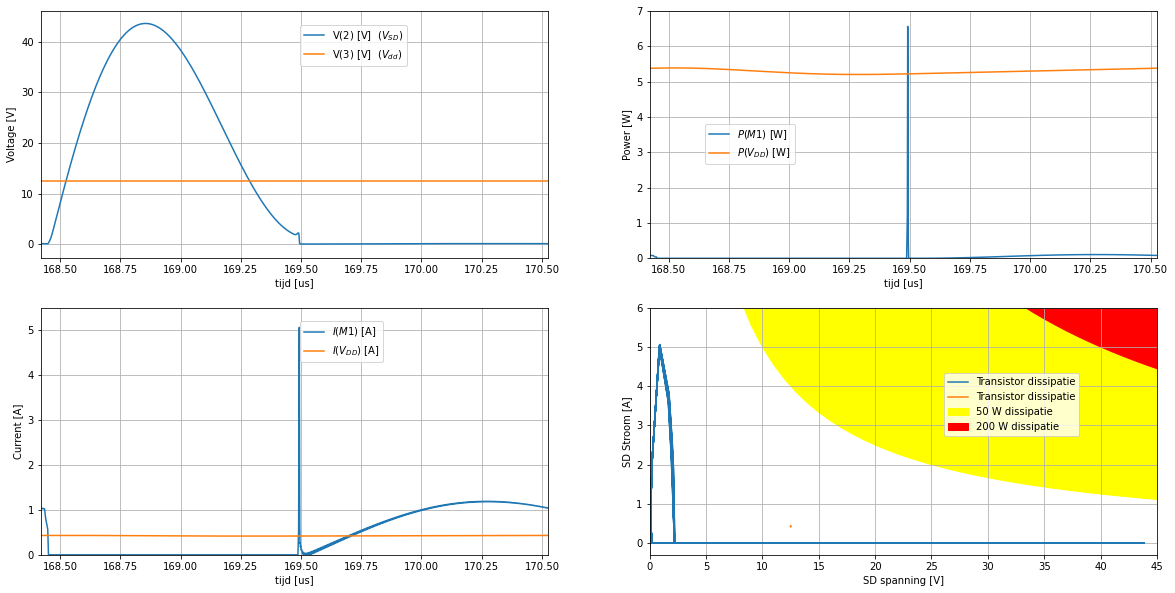

In [45]:
figure, ax = plt.subplots(2,2,figsize=(20, 10))
ax[0,0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax[0,0].plot(analysis.time*1e6,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax[0,0].legend( loc=(0.51,.78))
ax[0,0].grid()
ax[0,0].set_xlabel('tijd [us]')
ax[0,0].set_xlim(80*2.10526,81*2.10526)
ax[0,0].set_ylabel('Voltage [V]')
ax[1,0].plot(analysis.time*1e6,analysis.internal_parameters['@m_m1[id]'],label='$I(M1)$ [A]' )
ax[1,0].plot(analysis.time*1e6,-analysis.branches['v_vdd'],label='$I(V_{DD})$ [A]' )
#ax[1,0].plot(analysis.time*1e6,-analysis.branches['l_l2'],label='$I(L_{2})$ [A]' )
ax[1,0].legend( loc=(0.51,.78))
ax[1,0].grid()
ax[1,0].set_xlabel('tijd [us]')
ax[1,0].set_xlim(80*2.10526,81*2.10526)
ax[1,0].set_ylim(0,5.5)
ax[1,0].set_ylabel('Current [A]');
ax[0,1].plot(analysis.time*1e6,analysis.internal_parameters['@m_m1[id]']*analysis.nodes['2'],label='$P(M1)$ [W]' )
ax[0,1].plot(analysis.time*1e6,-analysis.branches['v_vdd']*analysis.nodes['3'],label='$P(V_{DD})$ [W]' )
#ax[0,1].plot(analysis.time*1e6,analysis.branches['l_l2']*analysis.nodes['5'],label='$P_{out}$ [W]' )
ax[0,1].legend( loc=(0.11,.38))
ax[0,1].grid()
ax[0,1].set_xlabel('tijd [us]')
ax[0,1].set_xlim(80*2.10526,81*2.10526)
ax[0,1].set_ylim(0,7)
ax[0,1].set_ylabel('Power [W]');
ax[1,1].plot(analysis.nodes['2'][60000:],analysis.internal_parameters['@m_m1[id]'][60000:],label='Transistor dissipatie' )
ax[1,1].plot(analysis.nodes['3'][60000:],-analysis.branches['v_vdd'][60000:],label='Transistor dissipatie' )
vref=np.arange(1,50,1)
ax[1,1].fill_between(vref,50/vref,200/vref,label='50 W dissipatie',color='yellow')
ax[1,1].fill_between(vref,200/vref,15+0*vref,label='200 W dissipatie',color='red')
ax[1,1].grid()
ax[1,1].legend( loc=(0.58,.48))
ax[1,1].set_xlabel('SD spanning [V]')
ax[1,1].set_xlim(0,45)
ax[1,1].set_ylim(-0.3,6)
ax[1,1].set_ylabel('SD Stroom [A]');

### Aanpassing aan een 50 Ohm coax-lijn

We kunnen het vorig ontwerp aan de hand van een transformator met wikkelverhouding 1.83 ook aanpassen aan een coax lijn van 50 Ohm.

###### VB1: Schema met aanpassing 50 Ohm coax

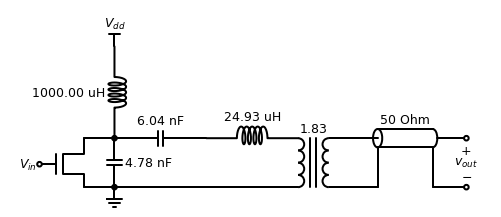

In [141]:
ClassECalc(TransformerCoax=True)

## VB2: Een 50W versterker of 137.77 kHz

Dit is een voorbeeld afkomstig van een driver voor [amateur korte-golf zender](https://people.physics.anu.edu.au/~dxt103/class-e/)


In [ ]:
1/137777,1/475000

###### VB2: berekende waardes

In [181]:
ClassECalc(Q=5, Vcc=12.5, Vo=0.9, f=137777,L1=0.00027, P=50,verbose=True,plot=False)

RL = 1.39 Ohm
C₁ = 176.90 nF, wat overeenkomt met een complexe impedantie van 6.53 i Ohm
C₂ = 222.56 nF, wat overeenkomt met een complexe impedantie van -5.19 i Ohm
L₂ = 8.03 uH, wat overeenkomt met een complexe impedantie van 6.95 i Ohm
De totale complexe impedantie van de seriekring is 1.76 i Ohm
De maximale stroom uit de voeding is 4310.34 mA
De maximale source-drain spanning over de transistor (inclusief veiligheidsmarge 80 %) is 55.62 V
We kunnen de uitgang omwerken naar een impedantie van 50 Ohm door een transformator met wikkelverhouding: 6.00 


###### VB2: bekomen schema

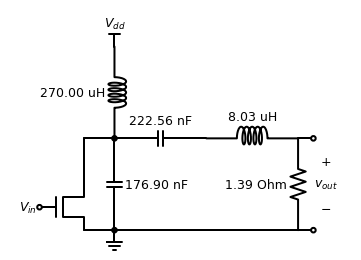

In [154]:
ClassECalc(Q=5, Vcc=12.5, Vo=0.9, f=137777,L1=0.00027, P=50)

###### VB2: bekomen schema met aanpassing coax

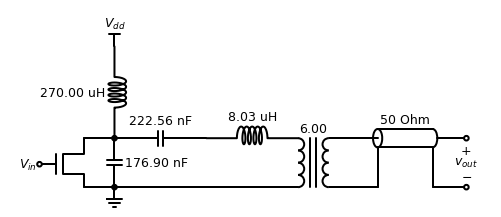

In [182]:
ClassECalc(Q=5, Vcc=12.5, Vo=0.9, f=137777,L1=0.00027, P=50,TransformerCoax=True)

###### VB2: SPICE file 

In [4]:
display.Code(filename="simul\classE.sp", language='spice') 

* Class E amp 1
M_M1         2 1 0 0 FDB33N25 
L_L1         2 3  270uH  
C_C1         2 0  176.9nF  
L_L2         4 5  8.03uH  
C_C2         2 4  222.56nF  
R_RL         5 0  1.39 
V_Vdd        3 0 12.5V
V_Vin        1 0 PULSE(0 9 3.65u 20n 20n 3.65u 7.3u) DC=0
.model FDB33N25 VDMOS(Rg=3 Rd=40m Rs=27m Vto=5.35 Kp=35 lambda=.05 Cgdmax=1.1n Cgdmin=25p Cgs=1.7n Cjo=800p Is=7.94p Rb=7m mfg=Fairchild Vds=250 Ron=94m Qg=37n)

```{code-block} spice
---
name: eSpice
caption: Klasse E spice file
---
```

###### VB2: bekomen oscillatie

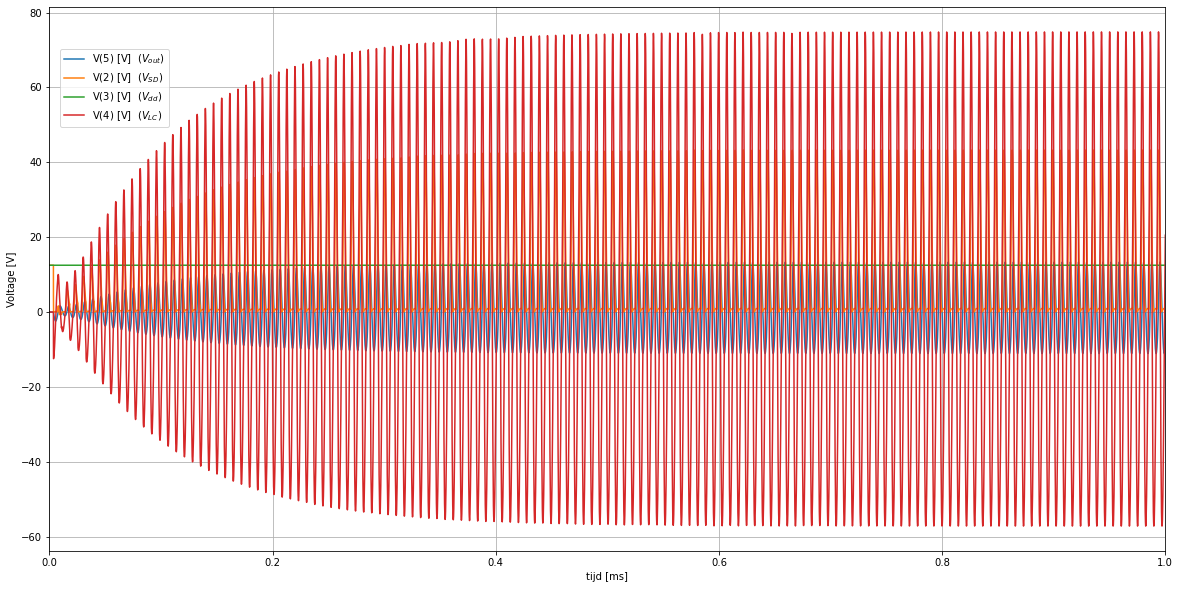

In [2]:
circuit=SpiceParser(path='simul\classE.sp').build_circuit()  
end_time=1e-3
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
simulator.save_currents="I1(M_M1)"
analysis = simulator.transient(step_time=2e-7, end_time=end_time)

figure, ax = plt.subplots(figsize=(20, 10))
ax.plot(analysis.time*1e3,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e3,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['4'],label='V(4) [V]  ($V_{LC}$)' )
ax.legend( loc=(0.01,.78))
ax.grid()
ax.set_xlabel('tijd [ms]')
ax.set_xlim(0,end_time*1e3)
ax.set_ylabel('Voltage [V]')
plt.show()

### detail van de opstartsequentie

###### bv2: detail opstartsequentie

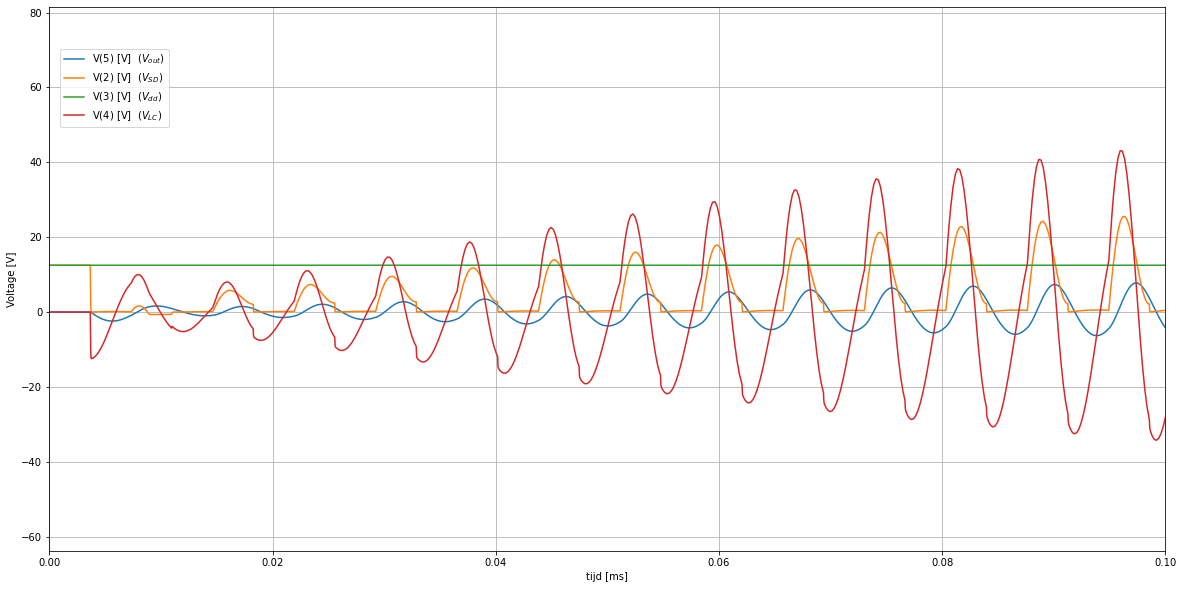

In [173]:
figure, ax = plt.subplots(figsize=(20, 10))
ax.plot(analysis.time*1e3,analysis.nodes['5'],label='V(5) [V]  ($V_{out}$)')
ax.plot(analysis.time*1e3,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax.plot(analysis.time*1e3,analysis.nodes['4'],label='V(4) [V]  ($V_{LC}$)' )
ax.legend( loc=(0.01,.78))
ax.grid()
ax.set_xlabel('tijd [ms]')
ax.set_xlim(0,end_time*1e2)
ax.set_ylabel('Voltage [V]')
plt.show()

### 1 periode van de Steady State

###### vb2: 1 periode van de Steady State

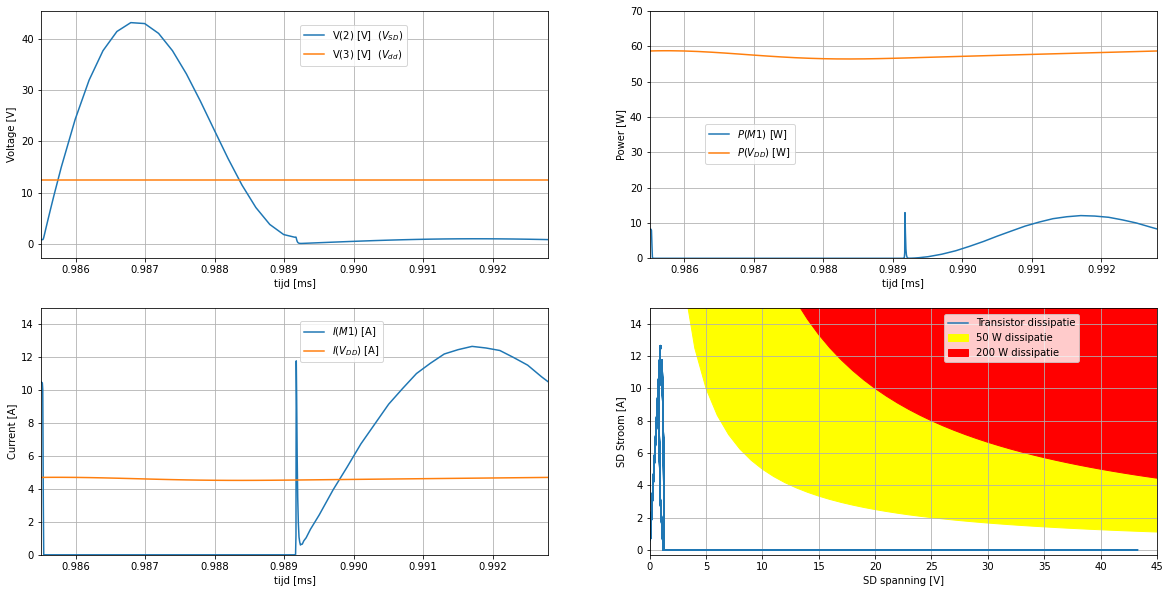

In [29]:
figure, ax = plt.subplots(2,2,figsize=(20, 10))
for i in range(2):
    for j in range(2):
        ax[i,j].tick_params(direction='in')
        ax[i,j].grid()
ax[0,0].plot(analysis.time*1e3,analysis.nodes['2'],label='V(2) [V]  ($V_{SD}$)' )
ax[0,0].plot(analysis.time*1e3,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax[0,0].legend( loc=(0.51,.78))
ax[0,0].set_xlabel('tijd [ms]')
ax[0,0].set_xlim(end_time*135*7.3,end_time*136*7.3)
ax[0,0].set_ylabel('Voltage [V]')
ax[1,0].plot(analysis.time*1e3,analysis.internal_parameters['@m_m1[id]'],label='$I(M1)$ [A]' )
ax[1,0].plot(analysis.time*1e3,-analysis.branches['v_vdd'],label='$I(V_{DD})$ [A]' )
ax[1,0].legend( loc=(0.51,.78))
ax[1,0].set_xlabel('tijd [ms]')
ax[1,0].set_xlim(end_time*135*7.3,end_time*136*7.3)
ax[1,0].set_ylim(0,15)
ax[1,0].set_ylabel('Current [A]');
ax[0,1].plot(analysis.time*1e3,analysis.internal_parameters['@m_m1[id]']*analysis.nodes['2'],label='$P(M1)$ [W]' )
ax[0,1].plot(analysis.time*1e3,-analysis.branches['v_vdd']*analysis.nodes['3'],label='$P(V_{DD})$ [W]' )
#ax[0,1].plot(analysis.time*1e3,analysis.branches['l_l2']*analysis.nodes['5'],label='$P_{out}$ [W]' )
ax[0,1].legend( loc=(0.11,.38))
ax[0,1].set_xlabel('tijd [ms]')
ax[0,1].set_xlim(end_time*135*7.3,end_time*136*7.3)
ax[0,1].set_ylim(0,70)
ax[0,1].set_ylabel('Power [W]');
ax[1,1].plot(analysis.nodes['2'][9500:],analysis.internal_parameters['@m_m1[id]'][9500:],label='Transistor dissipatie' )
vref=np.arange(1,50,1)
ax[1,1].fill_between(vref,50/vref,200/vref,label='50 W dissipatie',color='yellow')
ax[1,1].fill_between(vref,200/vref,15+0*vref,label='200 W dissipatie',color='red')
ax[1,1].legend( loc=(0.58,.78))
ax[1,1].set_xlabel('SD spanning [V]')
ax[1,1].set_xlim(0,45)
ax[1,1].set_ylim(-0.3,15)
ax[1,1].set_ylabel('SD Stroom [A]');

### 2 W aan 1MHz

###### vb3: 2 W aan 1 MHz: berekende waardes

In [51]:
ClassECalc(Q=2.5, Vcc=12.5, Vo=0.2, f=1000000,L1=27e-6, P=2, verbose=True, plot=False,TransformerCoax=False)

RL = 32.94 Ohm
C₁ = 1.63 nF, wat overeenkomt met een complexe impedantie van -97.84 i Ohm
C₂ = 4.71 nF, wat overeenkomt met een complexe impedantie van -33.82 i Ohm
L₂ = 13.11 uH, wat overeenkomt met een complexe impedantie van 82.36 i Ohm
De totale complexe impedantie van de seriekring is 48.54 i Ohm
De maximale stroom uit de voeding is 162.60 mA
De maximale source-drain spanning over de transistor (inclusief veiligheidsmarge 80 %) is 55.62 V
We kunnen de uitgang omwerken naar een impedantie van 50 Ohm door een transformator met wikkelverhouding: 1.23 


## Flat top

In 2013 werd het originele design uitgebreid door ook de derde harmonische weg te filteren <cite id="4ezyj"><a href="#zotero|1031761/UGXR92FN">[4]</a></cite>.


###### Klasse E met derde harmonische filter

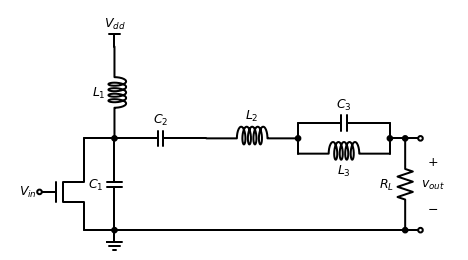

In [81]:
d = schem.Drawing()
d.add(e.VDD, label='$V_{dd}$')
L1 = d.add(e.INDUCTOR2, d='down', label='$L_1$')
d.add(e.DOT)
C2 = d.add(e.CAP, d='right', label='$C_2$')
L2 = d.add(e.INDUCTOR2, d='right', label='$L_2$')
d.add(e.DOT)
d.add(e.LINE,xy=L2.end, d='up',l=0.5)
C3 = d.add(e.CAP, d='right', label='$C_3$')
d.add(e.LINE, d='down',l=0.5)
d.add(e.DOT)
d.add(e.LINE,xy=L2.end, d='down',l=0.5)
L3 = d.add(e.INDUCTOR2, d='right', botlabel='$L_3$')
d.add(e.LINE, d='up',l=0.5)
d.add(e.LINE, d='right',l=0.5)
d.add(e.DOT)
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.DOT)
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=C2.start)
d.add(e.DOT)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)
C1 = d.add(e.CAP, d='down',xy=L1.end,toy=R.end, label='$C_1$')
d.add(e.GND)
d.add(e.LINE, d='left', l=1)
d.add(e.LINE, d='up', l=0.5)
T = d.add(e.NFET, d='left', lftlabel='$V_{in}$')
d.add(e.LINE, d='up',toy=R.start)
d.add(e.LINE,tox=L1.end, d='right')
d.add(e.DOT_OPEN, xy=T.gate)
d.draw()

## On-chip 2GHz Klasse E versterker voor GSM toepassingen

In 1999 hebben King-Chun Tsai en Paul Gray een 1.9GHz klasse E versterker voor GSM en DECT telefoon toepassingen ontworpen [ref]. De versterker bestaat uit 2 stages en elke stage is fully-differential uitgewerkt.

Het uiteindelijke schema zie je in {numref}`schema %s <Tsai_schema>`

###### Klasse E met injection locking

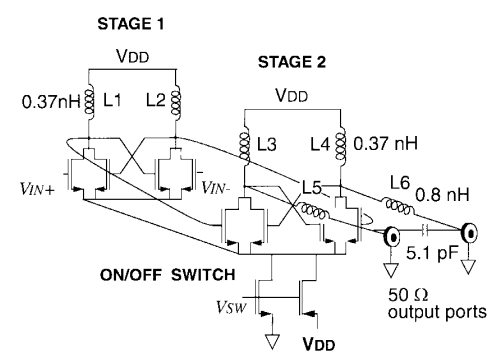

In [3]:
display.Image("./images/Tsai.png")

```{figure} ./images/Tsai.png
---
name: Tsai_schema
figclass: margin
---
Schema van de klasse E versterker met injection locking.
```

We kunnen dit schema uitwerken als een spice file (zie {numref}`eSpiceTsai`) en deze spice file simuleren.

###### SPICE file Klasse E circuit met injection locking

In [5]:
display.Code(filename="simul\classE-Tsai.sp", language='spice') 

* Class E Tsai
M_SWn        0 11 10 0 nmos W=31580u L=0.35u
M_SWp        3 11 10 3 pmos W=500u L=0.35u
* stage 1
L_L1         3 6  0.37nH
L_L2         3 7  0.37nH
M_11         10 1 6 0 nmos W=980u L=0.35u
M_12         10 7 6 0 nmos W=980u L=0.35u
M_13         10 6 7 0 nmos W=980u L=0.35u
M_14         10 2 7 0 nmos W=980u L=0.35u
* stage 2
M_21         10 6 8 0 nmos W=3600u L=0.35u
M_22         10 9 8 0 nmos W=4800u L=0.35u
M_23         10 8 9 0 nmos W=4800u L=0.35u
M_24         10 7 9 0 nmos W=3600u L=0.35u
L_L3         3 8  0.37nH
L_L4         3 9  0.37nH
L_L5         8 4  0.8nH 
L_L6         9 5  0.8nH 
C_C1         4 5  5.1pF
* belasting
R_RL1        4 0  50 
R_RL2        5 0  50 
.include simul/berkeley35.lib

```{code-block} spice
---
name: eSpiceTsai
caption: Klasse E spice file met injection locking
---
```

Het circuit is uitgevoerd in een 0.35 $\mu$m technologie. Normaal kan deze technologie gebruik maken van 5V voedingsspanning. Toch gebruiken we dit circuit met een voedingsspanning tussen de 1V en 2V. Dit is omdat er door de oscillatie hogere gate-spanningen worden bekomen en de maximale spanning over de gate is 5V.

###### simulatie Klasse E circuit met injection locking

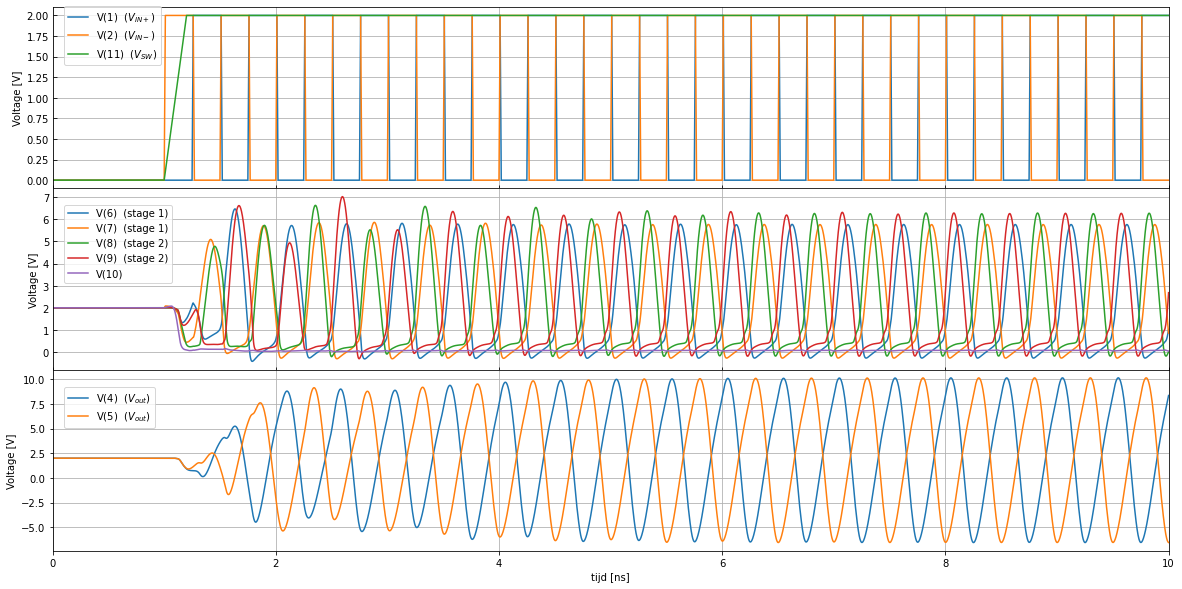

In [3]:
circuit=SpiceParser(path='simul\classE-Tsai.sp').build_circuit()
# parameters
freqentie,vdd,input_amplitude=2e9,2,2

period=1/freqentie
end_time=20*period

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
circuit.PulseVoltageSource('Vinp', '1', '0', 0, input_amplitude, pulse_width=period/2, period=period, delay_time=2.5*period, rise_time=10@u_ps, fall_time=10@u_ps)
circuit.PulseVoltageSource('Vinn', '2', '0', 0, input_amplitude, pulse_width=period/2, period=period, delay_time=2*period, rise_time=10@u_ps, fall_time=10@u_ps)
circuit.VoltageSource('Vdd','3','0',dc_value=vdd)  
circuit.PieceWiseLinearVoltageSource( 'VSW', '11', '0',values=[(0, 0), (1@u_ns, 0), (1.2@u_ns, vdd)],dc=0)
simulator.save_currents="I1"
analysis = simulator.transient(step_time=2e-12, end_time=end_time)

fig, ax = plt.subplots(3,figsize=(20, 10),sharex=True)
fig.subplots_adjust(hspace=0)
ax[0].tick_params(direction='in')
ax[1].tick_params(direction='in')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label='V(1)  ($V_{IN+}$)' )
ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label='V(2)  ($V_{IN-}$)' )
ax[0].plot(analysis.time*1e9,analysis.nodes['11'],label='V(11)  ($V_{SW}$)' )
ax[0].legend( loc=(0.01,.68))
ax[0].set_xlim(0,end_time*1e9)
ax[0].grid()
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['6'],label='V(6)  (stage 1)' )
ax[1].plot(analysis.time*1e9,analysis.nodes['7'],label='V(7)  (stage 1)' )
ax[1].plot(analysis.time*1e9,analysis.nodes['8'],label='V(8)  (stage 2)' )
ax[1].plot(analysis.time*1e9,analysis.nodes['9'],label='V(9)  (stage 2)' )
ax[1].plot(analysis.time*1e9,analysis.nodes['10'],label='V(10)' )
ax[1].legend( loc=(0.01,.48))
ax[1].grid()
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Voltage [V]')

ax[2].plot(analysis.time*1e9,analysis.nodes['4'],label='V(4)  ($V_{out}$)' )
ax[2].plot(analysis.time*1e9,analysis.nodes['5'],label='V(5)  ($V_{out}$)' )
ax[2].legend( loc=(0.01,.68))
ax[2].grid()
ax[2].set_xlim(0,end_time*1e9)
ax[2].set_ylabel('Voltage [V]')
ax[2].set_xlabel('tijd [ns]');

{numref}`esimTsai` toont de eerste 20 periodes uit de simulatie van het circuit. We merken op dat na ongeveer 10 periodes de uitgangssignalen in fase gaan lopen met de ingangssignalen. 

###### 1 periode M21

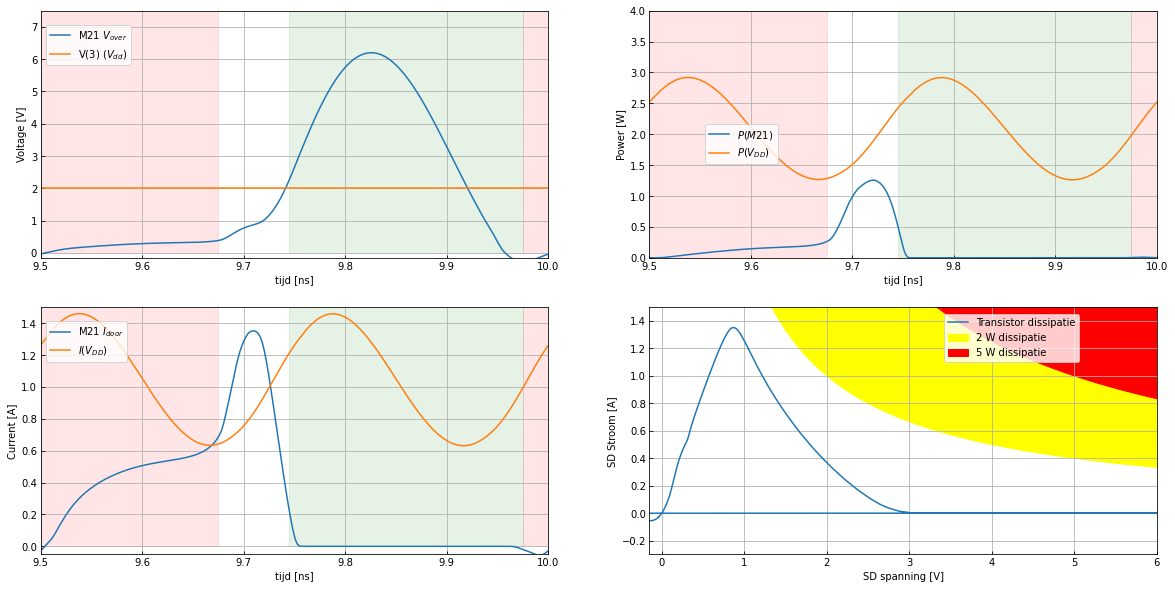

In [188]:
figure, ax = plt.subplots(2,2,figsize=(20, 10))
lastperiod=np.argmax(np.array(analysis.time) > (end_time-period))
plot_start_time,plot_end_time,plot_period=(end_time-period)*1e9,end_time*1e9,period*1e9
for i in range(2):
    for j in range(2):
        ax[i,j].tick_params(direction='in')
        ax[i,j].grid()
        if i==0 or j==0:
            ax[i,j].fill_between(x=[plot_start_time,plot_start_time+0.35*plot_period],y1=[20,20],color='red',alpha=0.1)
            ax[i,j].fill_between(x=[plot_end_time-0.05*plot_period,plot_end_time],y1=[20,20],color='red',alpha=0.1)
            ax[i,j].fill_between(x=[plot_start_time+0.49*plot_period,plot_end_time-0.05*plot_period],y1=[20,20],color='green',alpha=0.1)

ax[0,0].plot(analysis.time*1e9,analysis.nodes['8']-analysis.nodes['10'],label='M21 $V_{over}$'  )
ax[0,0].plot(analysis.time*1e9,analysis.nodes['3'],label='V(3) ($V_{dd}$)' )
ax[0,0].legend( loc=(0.01,.78))
ax[0,0].set_xlabel('tijd [ns]')
ax[0,0].set_xlim(plot_start_time,plot_end_time) 
ax[0,0].set_ylim(-0.15,7.5)
ax[0,0].set_ylabel('Voltage [V]')
ax[1,0].plot(analysis.time*1e9,-analysis.internal_parameters['@m_21[id]'],label='M21 $I_{door}$'  )
ax[1,0].plot(analysis.time*1e9,-analysis.branches['vvdd'],label='$I(V_{DD})$' )
ax[1,0].legend( loc=(0.01,.78))
ax[1,0].set_xlabel('tijd [ns]')
ax[1,0].set_xlim(plot_start_time,plot_end_time)  
ax[1,0].set_ylim(-0.05,1.5)
ax[1,0].set_ylabel('Current [A]');

ax[0,1].plot(analysis.time*1e9,-analysis.internal_parameters['@m_21[id]']*(analysis.nodes['8']-analysis.nodes['10']),label='$P(M21)$' )
ax[0,1].plot(analysis.time*1e9,-analysis.branches['vvdd']*analysis.nodes['3'],label='$P(V_{DD})$' )
ax[0,1].legend( loc=(0.11,.38))
ax[0,1].set_xlabel('tijd [ns]')
ax[0,1].set_xlim(plot_start_time,plot_end_time)
ax[0,1].set_ylim(0,4)
ax[0,1].set_ylabel('Power [W]');

ax[1,1].plot(analysis.nodes['8'][lastperiod:]-analysis.nodes['10'][lastperiod:],-analysis.internal_parameters['@m_21[id]'][lastperiod:],label='Transistor dissipatie' )
vref=np.arange(0.1,7,0.1)
ax[1,1].fill_between(vref,2/vref,5/vref,label='2 W dissipatie',color='yellow')
ax[1,1].fill_between(vref,5/vref,4+0*vref,label='5 W dissipatie',color='red')
ax[1,1].legend( loc=(0.58,.78))
ax[1,1].set_xlabel('SD spanning [V]')
ax[1,1].set_xlim(-0.15,6)
ax[1,1].set_ylim(-0.3,1.5)
ax[1,1].set_ylabel('SD Stroom [A]');

{numref}`eTsaiM21` gaat dieper in op de input transistor (M21) van stage 2. We herkennen de gebieden zonder stroom en met veel spanning over de transistor (groene achtergrond) en de gebieden met veel stroom en een beperkte spanning over de transistor (rode achtergrond). Toch is er ook een gebied waarin we zowel hoge stromen als hoge spanningen bekomen (witte achtergrond), In dit gebied hebben we dus geen perfecte klasse E werking. De tweede input transistor van stage 2 (M24) gedraagt zich op dezelfde wijze.
{numref}`eTsaiM22` toont hetzelfde voor de kruisgekoppelde transistor (M22) van stage 2. Hier kunnen we wel de totale periode opdelen in de 2 gebieden die de Klasse E kenmerken. De tweede kruisgekoppelde transistor van stage 2 (M23) gedraagt zich op dezelfde wijze.

###### 1 periode M22

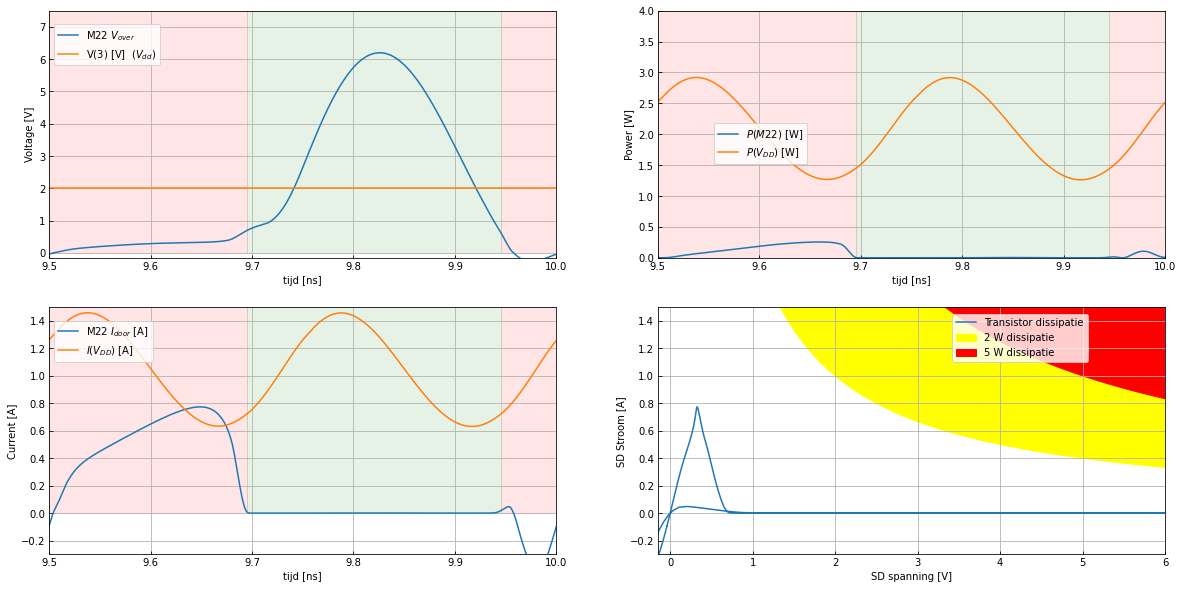

In [189]:
figure, ax = plt.subplots(2,2,figsize=(20, 10))
lastperiod=np.argmax(np.array(analysis.time) > (end_time-period))
plot_start_time,plot_end_time,plot_period=(end_time-period)*1e9,end_time*1e9,period*1e9
for i in range(2):
    for j in range(2):
        ax[i,j].tick_params(direction='in')
        ax[i,j].grid()
        if i==0 or j==0:
            ax[i,j].fill_between(x=[plot_start_time,plot_start_time+0.39*plot_period],y1=[20,20],color='red',alpha=0.1)
            ax[i,j].fill_between(x=[plot_end_time-0.11*plot_period,plot_end_time],y1=[20,20],color='red',alpha=0.1)
            ax[i,j].fill_between(x=[plot_start_time+0.39*plot_period,plot_end_time-0.11*plot_period],y1=[20,20],color='green',alpha=0.1)

ax[0,0].plot(analysis.time*1e9,analysis.nodes['8']-analysis.nodes['10'],label='M22 $V_{over}$'  )
ax[0,0].plot(analysis.time*1e9,analysis.nodes['3'],label='V(3) [V]  ($V_{dd}$)' )
ax[0,0].legend( loc=(0.01,.78))
ax[0,0].set_xlabel('tijd [ns]')
ax[0,0].set_xlim(plot_start_time,plot_end_time) 
ax[0,0].set_ylim(-0.15,7.5)
ax[0,0].set_ylabel('Voltage [V]')
ax[1,0].plot(analysis.time*1e9,-analysis.internal_parameters['@m_22[id]'],label='M22 $I_{door}$ [A]'  )
ax[1,0].plot(analysis.time*1e9,-analysis.branches['vvdd'],label='$I(V_{DD})$ [A]' )
ax[1,0].legend( loc=(0.01,.78))
ax[1,0].set_xlabel('tijd [ns]')
ax[1,0].set_xlim(plot_start_time,plot_end_time)  
ax[1,0].set_ylim(-0.3,1.5)
ax[1,0].set_ylabel('Current [A]');

ax[0,1].plot(analysis.time*1e9,-analysis.internal_parameters['@m_22[id]']*(analysis.nodes['8']-analysis.nodes['10']),label='$P(M22)$ [W]' )
ax[0,1].plot(analysis.time*1e9,-analysis.branches['vvdd']*analysis.nodes['3'],label='$P(V_{DD})$ [W]' )
ax[0,1].legend( loc=(0.11,.38))
ax[0,1].set_xlabel('tijd [ns]')
ax[0,1].set_xlim(plot_start_time,plot_end_time)
ax[0,1].set_ylim(0,4)
ax[0,1].set_ylabel('Power [W]');
ax[1,1].plot(analysis.nodes['8'][lastperiod:]-analysis.nodes['10'][lastperiod:],-analysis.internal_parameters['@m_22[id]'][lastperiod:],label='Transistor dissipatie' )
vref=np.arange(0.1,7,0.1)
ax[1,1].fill_between(vref,2/vref,5/vref,label='2 W dissipatie',color='yellow')
ax[1,1].fill_between(vref,5/vref,4+0*vref,label='5 W dissipatie',color='red')
ax[1,1].legend( loc=(0.58,.78))
ax[1,1].set_xlabel('SD spanning [V]')
ax[1,1].set_xlim(-0.15,6)
ax[1,1].set_ylim(-0.3,1.5)
ax[1,1].set_ylabel('SD Stroom [A]');

## Referenties

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|1031761/96BMKR88"></i>
    <div class="csl-left-margin">1.</div><div class="csl-right-inline">Sokal - 1998 - Class E high-efficiency power amplifiers, from HF .pdf. (n.d.).</div>
  </div>
  <div class="csl-entry"><i id="zotero|1031761/CXUZ8ZFG"></i>
    <div class="csl-left-margin">2.</div><div class="csl-right-inline">Nathan O. Sokal &#38; A. D. Sokal, Class E-A new class of high-efficiency tuned single-ended switching power amplifiers. <i>IEEE Journal of Solid-State Circuits</i>, <b>10</b> (1975) 168–176. https://doi.org/10.1109/JSSC.1975.1050582.</div>
  </div>
  <div class="csl-entry"><i id="zotero|1031761/G2K7PIUF"></i>
    <div class="csl-left-margin">3.</div><div class="csl-right-inline">Nathan O Sokal, Class-E RF Power Amplifiers. <i>QEX</i>, (2001) 9–20.</div>
  </div>
  <div class="csl-entry"><i id="zotero|1031761/UGXR92FN"></i>
    <div class="csl-left-margin">4.</div><div class="csl-right-inline">A. Mediano &#38; N. O. Sokal, A Class-E RF Power Amplifier With a Flat-Top Transistor-Voltage Waveform. <i>IEEE Transactions on Power Electronics</i>, <b>28</b> (2013) 5215–5221. https://doi.org/10.1109/TPEL.2013.2242097.</div>
  </div>
</div>
<!-- BIBLIOGRAPHY END -->

